In [1]:
import scipy
import numpy as np
from scipy.stats import norm
from scipy.stats import expon
from scipy.stats import binom
import matplotlib 
import matplotlib.pyplot as plt

<font size="5"><b>A Little Statistics</b></font> 

The normal (gaussian) distribution is given by the expression:

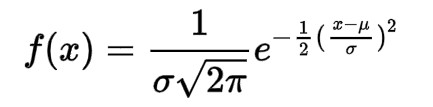

In [2]:
from IPython.display import Image
Image(filename='normal_distribution.jpg')

Where μ is the mean of the data and σ is the standard deviation. The gaussian distribution is very common in nature. Examples include height, school grades, IQ, coin toss results, etc. So it widely used. One of the parameters, standard deviation, describes the distance of a measurement from the mean. Given any value, we can say that value is any value multiplied by sigma from the mean (e.g. 1.3σ or 2σ). This is also known as the "z-score."

Now, to find the probability of a measurement lying within a specific z-score, we can integrate the gaussian function expression in the range of specified z-scores (PDF). 

If we want to find the probability that a statistic is greater than a certain z-score, we can use the complementary distribution function (CDF). This integrates the PDF from negative infinity to the specified z-score or from the z-score to positive infinity. 

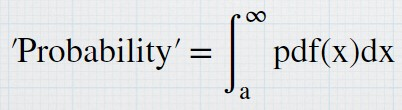

In [5]:
from IPython.display import Image
Image(filename='complementary_distribution.jpg')

In [2]:
print(norm.cdf(-4))
print(norm.cdf(2))
print(norm.cdf(.1))

3.167124183311986e-05
0.9772498680518208
0.539827837277029


Thankfully, this function is a feature of scipy library so we can get the probabilities easily. These values are also tabulated in case python is not available
https://en.wikipedia.org/wiki/Standard_normal_table

What if we want to do the inverse: get the sigma value in the normal distribution given a probability?

In [3]:
print(norm.ppf(3.167124183311986e-05))
print(norm.ppf(0.9772498680518208))
print(norm.ppf(0.539827837277029))

-4.000000000000001
2.0000000000000004
0.10000000000000002


The PPF feature takes input of percent (probability) and returns a sigma multiplier for where the probability occurs at.

In [11]:
#exponential function with λ = 1 (linear)
d = expon.rvs(loc = 0, scale = 1, size = 100000)

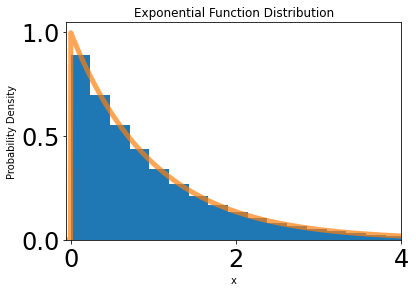

In [12]:
fig, ax = plt.subplots(1, 1)
ax.hist(d,50, density=True)
plt.tick_params(labelsize = 24)
plt.xlim([-.05,4.0])
plt.title("Exponential Function Distribution")
plt.xlabel("x")
plt.ylabel("Probability Density")
x = np.linspace(-.05,4.0,1000)
ax.plot(x,expon.pdf(x,loc = 0, scale = 1),linewidth = 5,alpha = 0.7)
plt.show()

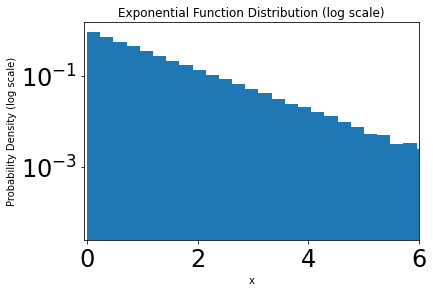

In [14]:
#log 
ax = plt.hist(d,50, density=True)
plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.xlim([-.05,6.0])
plt.xlabel("x")
plt.ylabel("Probability Density (log scale)")
plt.title("Exponential Function Distribution (log scale)")
plt.show()

If we select value 3.02, we can say that a measurement of 3.02 is "signal-like." Any measurement below this is considered not signal-like while measurements above this is "more signal-like." This is because, if we look at exponential distribution above, the higher the value of the measurement the less likely the signal is noise. Lower value measurements are more likely to be noise. We can ask the statistical question:
If the given signal-free data follows an exponential distribution, what is the probability that we find a value that is greater than or equal to 3.02?

Given that the exponential distribution is given by function     


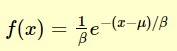

In [18]:
from IPython.display import Image
Image(filename='exponential_distribution.jpg')

where μ is the mean of the distribution and β = 1/λ is the scale parameter
What is the integral of this function in the bounds 3.02<x<infinity

To find the probability that the background produced this signal, we want to use cdf() function. This will integrate from positive infinity to that
point. But it would make more sense to integrate from the point to infinity so a solution to this is to simply subtract the probability from 1.

In [80]:
f = expon.cdf(3.02)
print(1-f)

0.04880121836201301


This means that the probability of the signal coming from the background (noise). Next we need to convert this to Xσ form with the PPF function. This will use the gaussian distribution since Xσ is of the form of the gaussian. The probability of background sending a certain signal is the same probability we will use to determine the sigma value in the gaussian.

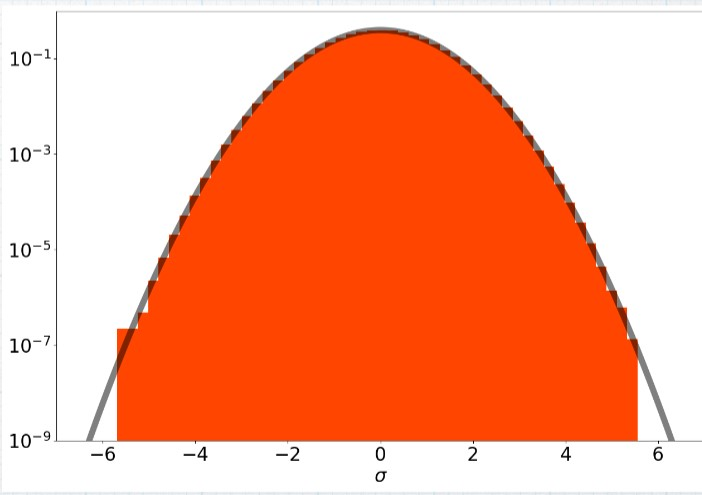

In [38]:
from IPython.display import Image
Image(filename='gaussian_distribution.jpg')

In [87]:
sigma = norm.ppf(0.04880121836201301)
print(sigma)

-1.6565897961517237


What we just did here is take the probability that the background noise gave a signal by integrating from 3.02 to infinity in the exponential distribution and use that to find the sigma value in the normal distribution. This is because integrating the normal distribution function from negative infinity to -1.66 (or 1.66 to positive infinity) is the same as integrating the exponential function from 3.02 to infinity. The result of all of this is that, the probability that we measure a value that is at least signal-like or more than 3.02 in the background noise, is 1.66σ.

In [ ]:
Next, let's explore different measurement values and see how that changes the probability and sigma values.

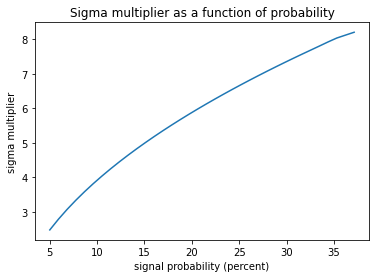

In [37]:
x = np.linspace(5, 50, 50)
f = norm.ppf(1 - expon.cdf(x))       #converts probability of signal into sigma value
y = np.abs(f)                        #only positive sigmas 
plt.title("Sigma multiplier as a function of probability")
plt.xlabel("signal probability (percent)")
plt.ylabel("sigma multiplier")

plt.plot(x, y);

What this is saying is that as the signal probability increases (lower value in signal free data) the sigma value also increases which makes sense because higher sigma values in the normal distribution will cover larger probabilities.

<font size="5"><b>Non-continuous Distributions (Binomial)</b></font>

The Binomial Distribution is a discrete probability distribution that describes the number of successes x in a total number of trials n. This means that there could only be two (bi) outcomes:success or failure, true or false, on or off, 1 or 0, heads or tails, etc. Given by expression:

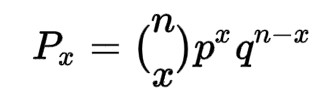

In [4]:
from IPython.display import Image
Image(filename='binomial_distribution.jpg')

where P(x) is binomial probability given x number of specific outcomes within n trials. p is probability of success on a single trial and q is probability of failure on a single trial.
In Summary, the binomial distribution data trials have the following constraints:
There are only 2 possible outcomes in a trial.
Each outcome has a specific fixed probability of occurring.
Each trials is independent of all others (second trial will have the same outcome probability as the first trial).

I will continue to use the heads/tails example in the following discussion.

We can use stats.binom, which takes in n and p as parameters, to plot the distribution. If we flip the coin 100 times, likelihood is that we will land heads 50% of the time.

In [42]:
def plot_distribution(n, p, type):
    fig, ax = plt.subplots(1, 1)
    binomial = binom.stats(n,p)
    x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
    plt.xlim([0,n])
    plt.xlabel("Number of coin flips giving " + type)
    plt.ylabel("Probability of " + type + " outcome (success)")
    ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label = 'binomial pmf')
    ax.vlines(x, 0, binom.pmf(x , n, p))

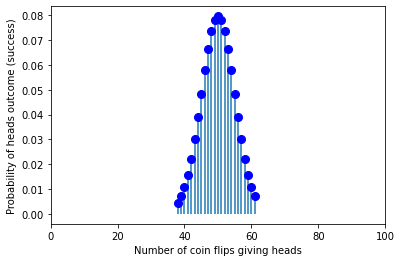

In [43]:
n, p = 100, 0.5
plot_distribution(n, p, 'heads')

And just to confirm that tails is an equally likely outcome over many coin flips:

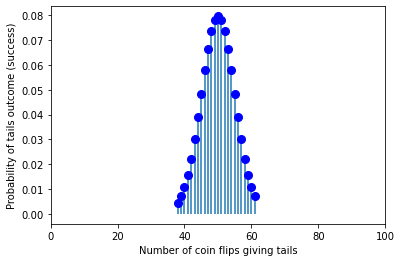

In [44]:
plot_distribution(100, 0.5, 'tails')

This confirms that heads/tails is 50/50 because the most probable outcome is 50% heads. We can see that towards the limits 0 and 100, the probability is so low that it is considered 0. What this means is that the likelihood of flipping all heads or all tails is almost 0%.

This might seem obvious, but this is only because I used n = 100. What if I used something like n = 4? or n = 5? What would the distribution look like then? Let's check:

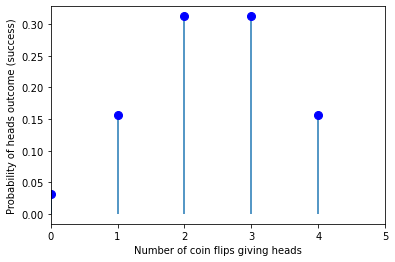

In [35]:
plot_distribution(5, 0.5, 'heads')

In this case, it seems that the outcome 0 heads is much more probable. What this means is that as the number of coin flips increases, the distribution will approach that familiar shape (gaussian

However, this does not make sense in the context of sigmas because sigma is given from the sum of probabilities from 0 to the value that we want. To involve sigmas, we want to ask the statistical question: When flipping the coin n number of times, what is the probability of the outcome you count being at most 50%? Or 60%? 100%? 
In all cases, we can use the same process when determining sigma. Add the probabilities of all outcomes UP to that value. Let us sum up to 50 heads for 100 coin flips

In [52]:
dist_range = np.arange(0, 50)
prob_values = binom.pmf(dist_range, 100, 0.5)
sum(prob_values)

0.4602053813063962

This is close to what we should expect from the gaussian distribution since the integral of the whole distribution is 1.

Let's see what the corresponding sigma value is:

In [53]:
norm.ppf(0.4602053813063962)

-0.09991631633382216

Which means this probability range is within one sigma. If I had picked a lower range, the sigma value would become larger.

The only other parameter we could change in binom is the probability parameter. It would not make sense to change this parameter in the coin example because the outcome is 50/50 but let's see what this does:

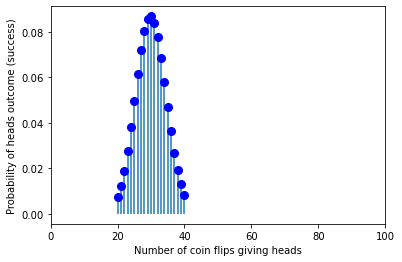

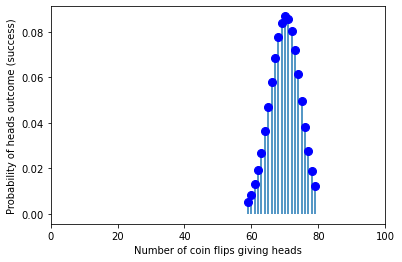

In [56]:
plot_distribution(100, 0.3, 'heads')
plot_distribution(100, 0.7, 'heads')

As Expected, the distribution is shifted over. So this parameter acts like the mean parameter in the normal distribution because all the data surrounds the value assigned.

We can see that these results are discrete, but the parameters of the distribution are not necessarily discrete. This is because the results are based on the fact that there are two different outcomes for each trial, i.e. we can't flip the coin and expect the coin to show part tails/part heads (unless you somehow manage to flip the coin onto its side). This is where the 1's and 0's binary example might be helpful.We can input a variety of letters into a computer, but it will always understand it as 1's and 0's. In the coin examples, we can input a probability of 0.7, but the results will always be discrete, i.e. heads/tails. Something like the probability parameter has to be continuous because probability is value between 0 and 1